# Human Activity Recognition

## Problem Statement:
 
To predict and recognize different human activities the person does. The data which contains the before recorded activities are taken and classified which is used for our requirement.

## Data Set:
The dataset consists of observations of 30 people doing different activities recorded by sensors. 
The whole data is splitted into 2 parts: Train(70%) and Test(30%)

## Attribute Information:
1. Triaxial (X,Y,Z) acceleration from accelerometer=Total Acceleration.
2. Triaxial (X,Y,Z) angular velocity from gyuroscope=Estimated body acceleration.
3. 561- Feature vector with time and frequency.
4. Activity Label
5. Identifier.

In [1]:
# To store data
import pandas as pd

# To do linear algebra
import numpy as np
from numpy import pi

# To create plots
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt

# To create nicer plots
import seaborn as sns

# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# To get new datatypes and functions
import collections
from collections import Counter
from cycler import cycler

# To investigate distributions
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit

# To build models
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# To measure time
from time import time

import warnings
warnings.filterwarnings('ignore')




In [46]:
#Loading Data sets
train_df= pd.read_csv('C:/Users/c_ksirisinahal/Desktop/Classification Problem/train_1/train.csv')
test_df = pd.read_csv('C:/Users/c_ksirisinahal/Desktop/Classification Problem/test_1/test.csv')
#train_df.head()

In [56]:
corr = train_df.corr()
corr
# corrmat = train_df.corr() 
# f, ax = plt.subplots(figsize =(6, 5)) 
# sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
tBodyAcc-mean()-X,1.000000,0.148061,-0.256952,0.000619,-0.021903,-0.044617,0.006290,-0.022754,-0.047558,0.044062,...,-0.017557,-0.015613,-0.544320,0.012173,0.037444,0.028844,-0.035257,0.034371,0.028242,0.024181
tBodyAcc-mean()-Y,0.148061,1.000000,-0.078769,-0.045160,-0.044920,-0.049746,-0.044180,-0.045049,-0.050402,-0.038108,...,-0.001587,-0.004459,0.070559,-0.013541,0.017967,0.075679,-0.005309,0.001053,-0.013903,-0.003144
tBodyAcc-mean()-Z,-0.256952,-0.078769,1.000000,-0.020217,-0.016641,-0.008410,-0.018747,-0.015203,-0.001988,-0.037197,...,0.020091,0.019127,0.052841,-0.039836,-0.063609,-0.034037,0.008587,-0.015288,-0.022643,-0.000637
tBodyAcc-std()-X,0.000619,-0.045160,-0.020217,1.000000,0.927461,0.851668,0.998632,0.920888,0.846392,0.980844,...,0.148034,0.115565,-0.035011,-0.021633,0.018985,-0.024810,-0.371653,0.471065,0.394825,-0.064345
tBodyAcc-std()-Y,-0.021903,-0.044920,-0.016641,0.927461,1.000000,0.895510,0.922803,0.997347,0.894509,0.917366,...,0.206227,0.176946,-0.020379,-0.012505,-0.008507,-0.014592,-0.380531,0.523600,0.433169,-0.115524
tBodyAcc-std()-Z,-0.044617,-0.049746,-0.008410,0.851668,0.895510,1.000000,0.844469,0.891441,0.997418,0.853884,...,0.157792,0.126701,-0.006769,-0.020036,-0.018429,-0.006471,-0.345011,0.476006,0.482828,-0.050123
tBodyAcc-mad()-X,0.006290,-0.044180,-0.018747,0.998632,0.922803,0.844469,1.000000,0.916106,0.839267,0.973216,...,0.149257,0.117804,-0.042713,-0.021537,0.019389,-0.024951,-0.368191,0.466424,0.390922,-0.063440
tBodyAcc-mad()-Y,-0.022754,-0.045049,-0.015203,0.920888,0.997347,0.891441,0.916106,1.000000,0.891178,0.910411,...,0.200890,0.172809,-0.023722,-0.012310,-0.012546,-0.012341,-0.377025,0.525081,0.431459,-0.114753
tBodyAcc-mad()-Z,-0.047558,-0.050402,-0.001988,0.846392,0.894509,0.997418,0.839267,0.891178,1.000000,0.847870,...,0.157937,0.127359,-0.008768,-0.020508,-0.023525,-0.007231,-0.347389,0.477607,0.479751,-0.055457
tBodyAcc-max()-X,0.044062,-0.038108,-0.037197,0.980844,0.917366,0.853884,0.973216,0.910411,0.847870,1.000000,...,0.154220,0.120023,-0.033048,-0.021895,0.025066,-0.028871,-0.384192,0.480229,0.405023,-0.055633


## Data Exploration:

1. The train and test data is combined and stored into a data frame for understanding of the activities.

In [3]:
# Combine boths dataframes
train_df['Data'] = 'Train'
test_df['Data'] = 'Test'
both_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
#The repeating columns are dropped and the values are considered.
both_df['subject'] = '#' + both_df['subject'].astype(str)


both_df.head()

#Array notation of activity categories.
#np.unique(train_df['subject'])

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,#1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,#1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,#1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,#1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,#1,STANDING,Train


This bar graph below plots the activities in the data.

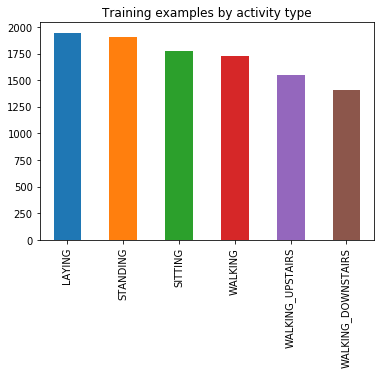

In [4]:
both_df['Activity'].value_counts().plot(kind='bar', title='Training examples by activity type')

This graph below gives the information of subject(users) in the data

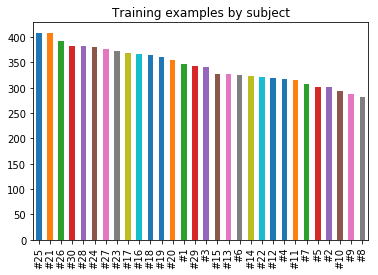

In [5]:
both_df['subject'].value_counts().plot(kind='bar', title='Training examples by subject');

2. Number of observations in Train and Test is recorded.

In [6]:
# Create label
label = both_df.pop('Activity')
#print(label)


In [7]:
#Shape of test and train data frames
print('Shape Train:\t{}'.format(train_df.shape))
print('Shape Test:\t{}\n'.format(test_df.shape))


Shape Train:	(7352, 564)
Shape Test:	(2947, 564)



3. First five observations are seen.

In [8]:
#First 5 observations in train_df 
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,Train


Checking of null values presence in the data frame.

In [9]:
# Get null values and dataframe information
print('Null Values In DataFrame: {}\n'.format(both_df.isna().sum().sum()))

#complete information regarding the dataframe both_df
both_df.info()

Null Values In DataFrame: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Data
dtypes: float64(561), object(2)
memory usage: 44.2+ MB


### Scaling the data:
1. Scaling is an important step because it neglects the data with high numerical ranges of data.
2. Kernel values usually depend on the inner products large attribute values might cause numerical problems, so we scale down the data.
3. Standardisation is used in this project. It removes mean and scales the data to unit variance.
4. Using principal component analysis we take only principal components that play a major role in our model. PCA is simply reducing the dimensions and taking the data in lesser dimensions.

In [10]:
# Create datasets
transformed_data = both_df.copy()
data_data = transformed_data.pop('Data')
subject_data = transformed_data.pop('subject')

# Scale data
scl = StandardScaler()
transformed_data = scl.fit_transform(transformed_data)

# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
transformed_data = pca.fit_transform(transformed_data)


1. Label Encoder is used to give numerical aliases for the respective classes.
2. Test and train are splitted into X_train, X_test, y_train, y_test i.e the data set and their respective labels.

In [11]:
# Split training testing data
enc = LabelEncoder()
label_encoded = enc.fit_transform(label)
X_train, X_test, y_train, y_test = train_test_split(transformed_data, label_encoded, random_state=3)



## Function for finding and showing the confusion matrix:

In [12]:
def Confusion(y_test,y_pred):
   # Creates a confusion matrix
    cm = confusion_matrix(y_test, y_pred) 
    print("Confusion Matrix:")
    print(cm)

# Transform to df for easier plotting
    cm_df = pd.DataFrame(cm,
                     index = ['0:walking',
               '1:walking_upstairs',
               '2:walking_downstairs',
               '3:sitting',
               '4:standing',
               '5:laying'], 
                     columns = ['0:walking',
               '1:walking_upstairs',
               '2:walking_downstairs',
               '3:sitting',
               '4:standing',
               '5:laying'])

    #plt.figure(figsize=(5.5,4))
    print("Confusion Matrix Plot:")
    sns.heatmap(cm_df, annot=True)
    plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show() 


# SVM Classification:
1. SVM offers very high accuracy compared to other classifiers and also reduced time. Different kernels are taken and their metrics are observed. 
2. The classifcation report gives precision, recall and F1 score of all the classes(Activities).
3. Confusion matrix for all the kernels is also shown.

## Running SVM with default hyperparameter
1. SVC with default parameters are taken and their metrics are calculated.

Accuracy Score:
91.92233009708738


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       502
           1       0.94      0.88      0.91       443
           2       0.94      0.92      0.93       457
           3       1.00      0.91      0.95       446
           4       0.69      0.99      0.82       343
           5       0.99      0.93      0.96       384

   micro avg       0.92      0.92      0.92      2575
   macro avg       0.93      0.92      0.92      2575
weighted avg       0.94      0.92      0.92      2575

Confusion Matrix:
[[456   0   0   0  46   0]
 [  4 389  27   0  23   0]
 [  0  24 419   0  14   0]
 [  0   0   0 405  40   1]
 [  0   0   0   0 341   2]
 [  0   0   0   0  27 357]]
Confusion Matrix Plot:


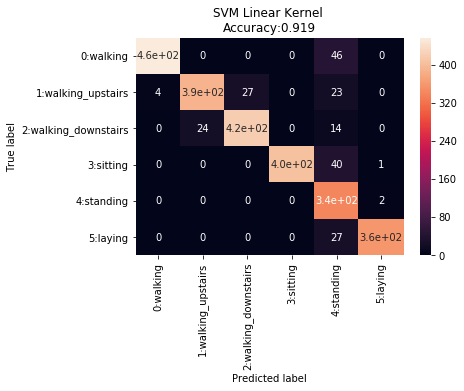

In [13]:
from sklearn.svm import SVC
from sklearn import metrics


svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
#Accuracy
print('Accuracy Score:')
SVC_default_accuracy = metrics.accuracy_score(y_test,y_pred)
#Classification Report of this SVM
print(metrics.accuracy_score(y_test,y_pred)*100)
print("\n")
print("Classification Report")
print(metrics.classification_report(y_test,y_pred))

#Confusion Matrix for the model
Confusion(y_test,y_pred)


## Accuracy of activities in test set:
Checking how much the model performs by fitting them to the data created of each activity separately.

In [14]:
data = []
labels=['LAYING','STANDING','SITTING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS' ]
# Iterate over each activity
for activity in labels:
    
    # Create dataset
    act_data = both_df[label==activity].copy()
    #print(act_data)
    act_data_data = act_data.pop('Data')
    act_subject_data = act_data.pop('subject')
    
    # Scale data
    scl = StandardScaler() 
    act_data = scl.fit_transform(act_data)

    # Reduce dimensions
    pca = PCA(n_components=0.9, random_state=3)
    act_data = pca.fit_transform(act_data)

# Split training testing data
    enc = LabelEncoder()
    label_encoded = enc.fit_transform(act_subject_data)
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(act_data, label_encoded, random_state=3)
    # Fit basic model
    print('Activity: {}'.format(activity))    
    svc=SVC()
    svc.fit(X_train_1,y_train_1)
        
    score = accuracy_score(y_true=y_test_1, y_pred=svc.predict(X_test_1))
    print('Accuracy on testset:\t{:.4f}\n'.format(score*100))
    data.append([activity, score])

Activity: LAYING
Accuracy on testset:	65.0206

Activity: STANDING
Accuracy on testset:	53.4591

Activity: SITTING
Accuracy on testset:	52.8090

Activity: WALKING
Accuracy on testset:	80.5104

Activity: WALKING_UPSTAIRS
Accuracy on testset:	75.9067

Activity: WALKING_DOWNSTAIRS
Accuracy on testset:	55.3977



## Linear Kernel
1. SVC with linear kernel is used on the data and respective metrics are calculated.

Accuracy Score:
95.76699029126213


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       502
           1       0.92      0.89      0.90       443
           2       0.90      0.93      0.91       457
           3       0.98      0.99      0.98       446
           4       0.98      0.98      0.98       343
           5       0.98      0.97      0.97       384

   micro avg       0.96      0.96      0.96      2575
   macro avg       0.96      0.96      0.96      2575
weighted avg       0.96      0.96      0.96      2575

Confusion Matrix:
[[500   2   0   0   0   0]
 [  2 393  47   0   0   1]
 [  0  33 424   0   0   0]
 [  0   0   0 441   1   4]
 [  0   0   0   4 335   4]
 [  0   0   0   6   5 373]]
Confusion Matrix Plot:


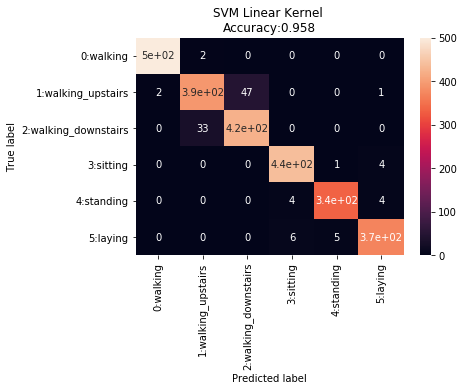

In [15]:
svcl=SVC(kernel='linear')
svcl.fit(X_train,y_train)
y_pred=svcl.predict(X_test)
print('Accuracy Score:')
linear_default_accuracy=metrics.accuracy_score(y_test,y_pred)
print(metrics.accuracy_score(y_test,y_pred)*100)
print("\n")
print("Classification Report")
print(metrics.classification_report(y_test,y_pred))

#Confusion Matrix for the model
Confusion(y_test,y_pred)

## Accuracy of activities in test set:
Checking how much the model performs by fitting them to the data created of each activity separately.

In [16]:
data = []
labels=['LAYING','STANDING','SITTING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS' ]
# Iterate over each activity
for activity in labels: 
    # Create dataset
    act_data = both_df[label==activity].copy()
#print(act_data)
    act_data_data = act_data.pop('Data')
    act_subject_data = act_data.pop('subject')
    
# Scale data
    scl = StandardScaler() 
    act_data = scl.fit_transform(act_data)

# Reduce dimensions
    pca = PCA(n_components=0.9, random_state=3)
    act_data = pca.fit_transform(act_data)

# Split training testing data
    enc = LabelEncoder()
    label_encoded = enc.fit_transform(act_subject_data)
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(act_data, label_encoded, random_state=3)
    print('Activity: {}'.format(activity))    
    svcl=SVC(kernel='linear')
    svcl.fit(X_train_1,y_train_1)
        
    score = accuracy_score(y_true=y_test_1, y_pred=svcl.predict(X_test_1))
    print('Accuracy on testset:\t{:.4f}\n'.format(score*100))
    data.append([activity, score])

Activity: LAYING
Accuracy on testset:	78.1893

Activity: STANDING
Accuracy on testset:	66.0377

Activity: SITTING
Accuracy on testset:	55.5056

Activity: WALKING
Accuracy on testset:	99.5360

Activity: WALKING_UPSTAIRS
Accuracy on testset:	99.7409

Activity: WALKING_DOWNSTAIRS
Accuracy on testset:	98.5795



## Linear SVM with GridSearchCV

# Parameters of SVM:
1. C and Gamma are the hyper parameters for a nonlinear support vector machine (SVM) with a Gaussian radial basis function kernel.
2. C is nothing but how much we cost or penalize the datapoints in the margin when they are on the wrong side. This affects the hyperplane. Large C implies the hyperplane margin is minimum and very few points are within the margin. It results in the complex overfitted model. Smaller C gives larger margin but results in errors on training set.
3. Gamma is the parameter of the kernel. It gives how much two points are similar. It also maintains the standard deviation of the gaussain distribution for our dataset.

# Tuning the parameters:
Here GridSearchCV is used to tune these C and Gamma parameters. 

# Why GridSearchCV?
Without GridSearchCV you would need to loop over the parameters and then run all the combinations of parameters. If you were then after a cross-validated result, you would also need to add the code to find the best average CV results across all the combinations of parameters.
The parameter grid defines different parameter values we want to try. The grid search will try all combinations of parameter values and select the set of parameters which provides the most accurate model.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   14.0s finished


Accuracy Score:
95.76699029126213


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       502
           1       0.92      0.88      0.90       443
           2       0.90      0.93      0.91       457
           3       0.98      0.99      0.98       446
           4       0.97      0.98      0.98       343
           5       0.98      0.97      0.98       384

   micro avg       0.96      0.96      0.96      2575
   macro avg       0.96      0.96      0.96      2575
weighted avg       0.96      0.96      0.96      2575

Confusion Matrix:
[[500   2   0   0   0   0]
 [  2 392  48   0   0   1]
 [  0  33 424   0   0   0]
 [  0   0   0 441   2   3]
 [  0   0   0   4 337   2]
 [  0   0   0   5   7 372]]
Confusion Matrix Plot:


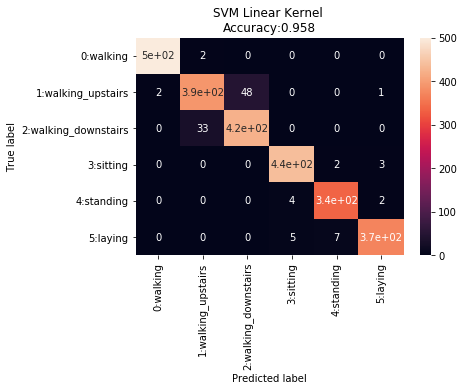

In [17]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = SVC(kernel = 'linear').fit(X_train,y_train)
#lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)

lr_svc_grid.fit(X_train, y_train)
y_pred = lr_svc_grid.predict(X_test)
print('Accuracy Score:')
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
linea_grid_accuracy=accuracy
print(metrics.accuracy_score(y_test,y_pred)*100)
print("\n")
print("Classification Report")
print(metrics.classification_report(y_test,y_pred))

#Confusion Matrix for the model
Confusion(y_test,y_pred)



In [18]:
import warnings
warnings.filterwarnings('ignore')

data = []
labels=['LAYING','STANDING','SITTING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS' ]
# Iterate over each activity
for activity in labels: 
    # Create dataset
    act_data = both_df[label==activity].copy()
#print(act_data)
    act_data_data = act_data.pop('Data')
    act_subject_data = act_data.pop('subject')
    
# Scale data
    scl = StandardScaler() 
    act_data = scl.fit_transform(act_data)

# Reduce dimensions
    pca = PCA(n_components=0.9, random_state=3)
    act_data = pca.fit_transform(act_data)

# Split training testing data
    enc = LabelEncoder()
    label_encoded = enc.fit_transform(act_subject_data)
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(act_data, label_encoded, random_state=3)
    print('Activity: {}'.format(activity))    
    parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
    lr_svc = SVC(kernel = 'linear').fit(X_train,y_train)
    lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)

    lr_svc_grid.fit(X_train_1, y_train_1)
            
    score = accuracy_score(y_true=y_test_1, y_pred = lr_svc_grid.predict(X_test_1))
    print('Accuracy on testset:\t{:.4f}\n'.format(score*100))
    data.append([activity, score])

Activity: LAYING
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.9s finished


Accuracy on testset:	76.9547

Activity: STANDING
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.0s finished


Accuracy on testset:	66.4570

Activity: SITTING
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.9s finished


Accuracy on testset:	55.5056

Activity: WALKING
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.7s finished


Accuracy on testset:	99.5360

Activity: WALKING_UPSTAIRS
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.6s finished


Accuracy on testset:	99.7409

Activity: WALKING_DOWNSTAIRS
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Accuracy on testset:	98.5795



[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.5s finished


## Accuracy of activities in test set:
Checking how much the model performs by fitting them to the data created of each activity separately.

## Default RBF kernel
1. SVC with default RBF kernel is used on the data and respective metrics are calculated.

Accuracy Score:
91.92233009708738


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       502
           1       0.94      0.88      0.91       443
           2       0.94      0.92      0.93       457
           3       1.00      0.91      0.95       446
           4       0.69      0.99      0.82       343
           5       0.99      0.93      0.96       384

   micro avg       0.92      0.92      0.92      2575
   macro avg       0.93      0.92      0.92      2575
weighted avg       0.94      0.92      0.92      2575

Confusion Matrix:
[[456   0   0   0  46   0]
 [  4 389  27   0  23   0]
 [  0  24 419   0  14   0]
 [  0   0   0 405  40   1]
 [  0   0   0   0 341   2]
 [  0   0   0   0  27 357]]
Confusion Matrix Plot:


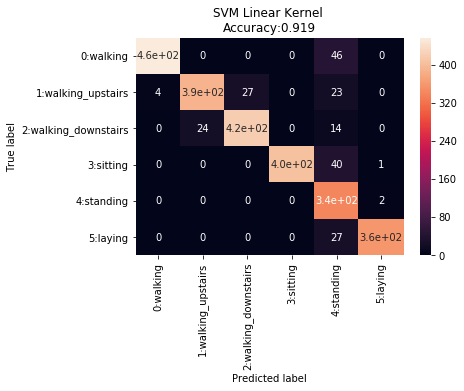

In [19]:
svcr=SVC(kernel='rbf')
svcr.fit(X_train,y_train)
y_pred=svcr.predict(X_test)
print('Accuracy Score:')
rbf_default_accuracy=metrics.accuracy_score(y_test,y_pred)

print(metrics.accuracy_score(y_test,y_pred)*100)
print("\n")
print("Classification Report")
print(metrics.classification_report(y_test,y_pred))

#Confusion Matrix for the model
Confusion(y_test,y_pred)


## Accuracy of activities in test set:
Checking how much the model performs by fitting them to the data created of each activity separately.

In [20]:
import warnings
warnings.filterwarnings('ignore')

data = []
labels=['LAYING','STANDING','SITTING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS' ]
# Iterate over each activity
for activity in labels: 
    # Create dataset
    act_data = both_df[label==activity].copy()
#print(act_data)
    act_data_data = act_data.pop('Data')
    act_subject_data = act_data.pop('subject')
    
# Scale data
    scl = StandardScaler() 
    act_data = scl.fit_transform(act_data)

# Reduce dimensions
    pca = PCA(n_components=0.9, random_state=3)
    act_data = pca.fit_transform(act_data)

# Split training testing data
    enc = LabelEncoder()
    label_encoded = enc.fit_transform(act_subject_data)
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(act_data, label_encoded, random_state=3)
    print('Activity: {}'.format(activity))    
    svcr=SVC(kernel='rbf')
    svcr.fit(X_train_1,y_train_1)
                
    score = accuracy_score(y_true=y_test_1, y_pred=svcr.predict(X_test_1))
    print('Accuracy on testset:\t{:.4f}\n'.format(score*100))
    data.append([activity, score])

Activity: LAYING
Accuracy on testset:	65.0206

Activity: STANDING
Accuracy on testset:	53.4591

Activity: SITTING
Accuracy on testset:	52.8090

Activity: WALKING
Accuracy on testset:	80.5104

Activity: WALKING_UPSTAIRS
Accuracy on testset:	75.9067

Activity: WALKING_DOWNSTAIRS
Accuracy on testset:	55.3977



## RBF Kernel SVM with GridSearchCV

Accuracy Score:
96.58252427184466


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       502
           1       0.94      0.94      0.94       443
           2       0.96      0.93      0.94       457
           3       1.00      0.98      0.99       446
           4       0.90      1.00      0.95       343
           5       1.00      0.97      0.99       384

   micro avg       0.97      0.97      0.97      2575
   macro avg       0.96      0.97      0.97      2575
weighted avg       0.97      0.97      0.97      2575

Confusion Matrix:
[[492   0   0   0  10   0]
 [  2 417  19   0   4   1]
 [  0  28 426   0   3   0]
 [  0   0   0 435  11   0]
 [  0   0   0   0 343   0]
 [  0   0   0   0  10 374]]
Confusion Matrix Plot:


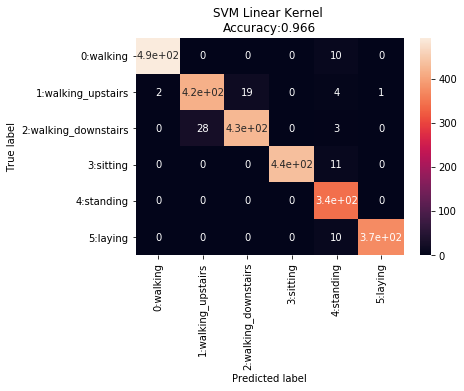

In [21]:
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)

rbf_svm_grid.fit(X_train, y_train)
y_pred = rbf_svm_grid.predict(X_test)
print('Accuracy Score:')
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
rbf_grid_accuracy=metrics.accuracy_score(y_test,y_pred)
print(metrics.accuracy_score(y_test,y_pred)*100)
print("\n")
print("Classification Report")
print(metrics.classification_report(y_test,y_pred))

#Confusion Matrix for the model
Confusion(y_test,y_pred)




## Accuracy of activities in test set:
Checking how much the model performs by fitting them to the data created of each activity separately.

In [22]:
import warnings
warnings.filterwarnings('ignore')

data = []
labels=['LAYING','STANDING','SITTING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS' ]
# Iterate over each activity
for activity in labels: 
    # Create dataset
    act_data = both_df[label==activity].copy()
#print(act_data)
    act_data_data = act_data.pop('Data')
    act_subject_data = act_data.pop('subject')
    
# Scale data
    scl = StandardScaler() 
    act_data = scl.fit_transform(act_data)

# Reduce dimensions
    pca = PCA(n_components=0.9, random_state=3)
    act_data = pca.fit_transform(act_data)

# Split training testing data
    enc = LabelEncoder()
    label_encoded = enc.fit_transform(act_subject_data)
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(act_data, label_encoded, random_state=3)
    print('Activity: {}'.format(activity))    
    parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
    rbf_svm = SVC(kernel='rbf')
    rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)

    rbf_svm_grid.fit(X_train_1, y_train_1)
                    
    score = accuracy_score(y_true=y_test_1, y_pred = rbf_svm_grid.predict(X_test_1))
    print('Accuracy on testset:\t{:.4f}\n'.format(score*100))
    data.append([activity, score])

Activity: LAYING
Accuracy on testset:	74.4856

Activity: STANDING
Accuracy on testset:	67.5052

Activity: SITTING
Accuracy on testset:	63.1461

Activity: WALKING
Accuracy on testset:	94.4316

Activity: WALKING_UPSTAIRS
Accuracy on testset:	95.0777

Activity: WALKING_DOWNSTAIRS
Accuracy on testset:	93.1818



## Default Polynomial kernel
1. SVC with default Polynomial kernel is used on the data and respective metrics are calculated.

Accuracy Score:
96.97087378640776


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       502
           1       0.92      0.93      0.92       443
           2       0.93      0.93      0.93       457
           3       0.99      1.00      0.99       446
           4       0.99      0.99      0.99       343
           5       0.99      0.99      0.99       384

   micro avg       0.97      0.97      0.97      2575
   macro avg       0.97      0.97      0.97      2575
weighted avg       0.97      0.97      0.97      2575

Confusion Matrix:
[[500   1   0   1   0   0]
 [  2 410  30   0   0   1]
 [  0  34 423   0   0   0]
 [  0   0   0 445   1   0]
 [  0   0   0   2 340   1]
 [  0   0   0   3   2 379]]
Confusion Matrix Plot:


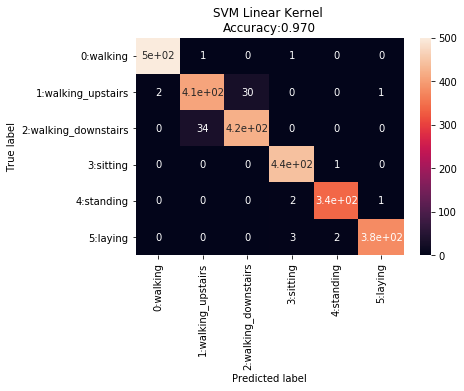

In [23]:
svcp=SVC(kernel='poly')
svcp.fit(X_train,y_train)
y_pred=svcp.predict(X_test)
print('Accuracy Score:')
poly_default_accuracy=metrics.accuracy_score(y_test,y_pred)

print(metrics.accuracy_score(y_test,y_pred)*100)
print("\n")
print("Classification Report")
print(metrics.classification_report(y_test,y_pred))

#Confusion Matrix for the model
Confusion(y_test,y_pred)


## Accuracy of activities in test set:
Checking how much the model performs by fitting them to the data created of each activity separately.

In [24]:
import warnings
warnings.filterwarnings('ignore')

data = []
labels=['LAYING','STANDING','SITTING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS' ]
# Iterate over each activity
for activity in labels: 
    # Create dataset
    act_data = both_df[label==activity].copy()
#print(act_data)
    act_data_data = act_data.pop('Data')
    act_subject_data = act_data.pop('subject')
    
# Scale data
    scl = StandardScaler() 
    act_data = scl.fit_transform(act_data)

# Reduce dimensions
    pca = PCA(n_components=0.9, random_state=3)
    act_data = pca.fit_transform(act_data)

# Split training testing data
    enc = LabelEncoder()
    label_encoded = enc.fit_transform(act_subject_data)
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(act_data, label_encoded, random_state=3)
    print('Activity: {}'.format(activity))    
    svcp=SVC(kernel='poly')
    svcp.fit(X_train_1,y_train_1)
                    
    score = accuracy_score(y_true=y_test_1, y_pred=svcp.predict(X_test_1))
    print('Accuracy on testset:\t{:.4f}\n'.format(score*100))
    data.append([activity, score])

Activity: LAYING
Accuracy on testset:	71.8107

Activity: STANDING
Accuracy on testset:	63.9413

Activity: SITTING
Accuracy on testset:	57.9775

Activity: WALKING
Accuracy on testset:	99.0719

Activity: WALKING_UPSTAIRS
Accuracy on testset:	95.5959

Activity: WALKING_DOWNSTAIRS
Accuracy on testset:	94.3182



## Polynomial Kernel SVM with GridSearchCV

Accuracy Score:
97.20388349514563


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       502
           1       0.93      0.93      0.93       443
           2       0.93      0.94      0.94       457
           3       0.99      1.00      0.99       446
           4       0.99      0.99      0.99       343
           5       0.99      0.99      0.99       384

   micro avg       0.97      0.97      0.97      2575
   macro avg       0.97      0.97      0.97      2575
weighted avg       0.97      0.97      0.97      2575

Confusion Matrix:
[[500   1   0   1   0   0]
 [  2 410  30   0   0   1]
 [  0  28 429   0   0   0]
 [  0   0   0 445   1   0]
 [  0   0   0   2 340   1]
 [  0   0   0   3   2 379]]
Confusion Matrix Plot:


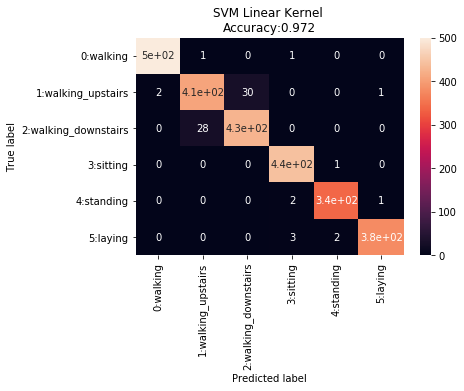

In [25]:
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
poly_svm = SVC(kernel='poly')
poly_svm_grid = GridSearchCV(poly_svm,param_grid=parameters, n_jobs=-1)

poly_svm_grid.fit(X_train, y_train)
y_pred = poly_svm_grid.predict(X_test)
print('Accuracy Score:')
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
poly_grid_accuracy=metrics.accuracy_score(y_test,y_pred)
print(metrics.accuracy_score(y_test,y_pred)*100)
print("\n")
print("Classification Report")
print(metrics.classification_report(y_test,y_pred))

#Confusion Matrix for the model
Confusion(y_test,y_pred)


## Accuracy of activities in test set:
Checking how much the model performs by fitting them to the data created of each activity separately.

In [26]:
import warnings
warnings.filterwarnings('ignore')

data = []
labels=['LAYING','STANDING','SITTING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS' ]
# Iterate over each activity
for activity in labels: 
    # Create dataset
    act_data = both_df[label==activity].copy()
#print(act_data)
    act_data_data = act_data.pop('Data')
    act_subject_data = act_data.pop('subject')
    
# Scale data
    scl = StandardScaler() 
    act_data = scl.fit_transform(act_data)

# Reduce dimensions
    pca = PCA(n_components=0.9, random_state=3)
    act_data = pca.fit_transform(act_data)

# Split training testing data
    enc = LabelEncoder()
    label_encoded = enc.fit_transform(act_subject_data)
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(act_data, label_encoded, random_state=3)
    print('Activity: {}'.format(activity))    
    parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
    poly_svm = SVC(kernel='poly')
    poly_svm_grid = GridSearchCV(poly_svm,param_grid=parameters, n_jobs=-1)

    poly_svm_grid.fit(X_train_1, y_train_1)
                
    score = accuracy_score(y_true=y_test_1,y_pred = poly_svm_grid.predict(X_test_1))
    print('Accuracy on testset:\t{:.4f}\n'.format(score*100))
    data.append([activity, score])

Activity: LAYING
Accuracy on testset:	71.8107

Activity: STANDING
Accuracy on testset:	63.9413

Activity: SITTING
Accuracy on testset:	57.9775

Activity: WALKING
Accuracy on testset:	99.0719

Activity: WALKING_UPSTAIRS
Accuracy on testset:	95.5959

Activity: WALKING_DOWNSTAIRS
Accuracy on testset:	94.3182



## Comparision of the kernels: (From above calculations)
1. Accuracy is highesh for Polynomial Kernel and least for RBF Kenel for this data.


## Logistic Regression with GridSearchCV

In [27]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

To reduce the future warnings in the above model, we use warnings.

In [28]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   12.6s finished


Accuracy Score:
95.72815533980582


Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       502
           1       0.92      0.88      0.90       443
           2       0.89      0.92      0.91       457
           3       0.99      0.99      0.99       446
           4       0.98      0.98      0.98       343
           5       0.98      0.98      0.98       384

   micro avg       0.96      0.96      0.96      2575
   macro avg       0.96      0.96      0.96      2575
weighted avg       0.96      0.96      0.96      2575

Confusion Matrix:
[[502   0   0   0   0   0]
 [  3 391  48   0   0   1]
 [  0  36 420   1   0   0]
 [  0   0   1 442   1   2]
 [  0   0   1   3 335   4]
 [  0   0   1   2   6 375]]
Confusion Matrix Plot:


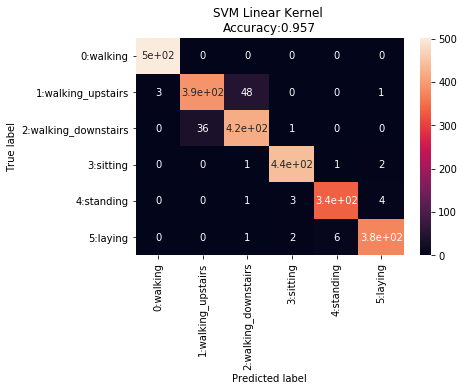

In [29]:
#Grid Search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30]} #General Hyper parameters
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)

log_reg_grid.fit(X_train, y_train)
y_pred = log_reg_grid.predict(X_test)
print('Accuracy Score:')
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
log_grid_accuracy = metrics.accuracy_score(y_test,y_pred)
print(metrics.accuracy_score(y_test,y_pred)*100)
print("\n")
print("Classification Report")
print(metrics.classification_report(y_test,y_pred))

#Confusion Matrix for the model
Confusion(y_test,y_pred)



## Accuracy of activities in test set:
Checking how much the model performs by fitting them to the data created of each activity separately.

In [30]:
import warnings
warnings.filterwarnings('ignore')

data = []
labels=['LAYING','STANDING','SITTING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS' ]
# Iterate over each activity
for activity in labels: 
    # Create dataset
    act_data = both_df[label==activity].copy()
#print(act_data)
    act_data_data = act_data.pop('Data')
    act_subject_data = act_data.pop('subject')
    
# Scale data
    scl = StandardScaler() 
    act_data = scl.fit_transform(act_data)

# Reduce dimensions
    pca = PCA(n_components=0.9, random_state=3)
    act_data = pca.fit_transform(act_data)

# Split training testing data
    enc = LabelEncoder()
    label_encoded = enc.fit_transform(act_subject_data)
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(act_data, label_encoded, random_state=3)
    print('Activity: {}'.format(activity))    
    parameters = {'C':[0.01, 0.1, 1, 10, 20, 30]} #General Hyper parameters
    log_reg = linear_model.LogisticRegression()
    log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)

    log_reg_grid.fit(X_train_1, y_train_1)
                
    score = accuracy_score(y_true=y_test_1,y_pred = log_reg_grid.predict(X_test_1))
    print('Accuracy on testset:\t{:.4f}\n'.format(score*100))
    data.append([activity, score])

Activity: LAYING
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    5.3s finished


Accuracy on testset:	69.7531

Activity: STANDING
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    5.9s finished


Accuracy on testset:	56.8134

Activity: SITTING
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    5.0s finished


Accuracy on testset:	47.6404

Activity: WALKING
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    3.0s finished


Accuracy on testset:	99.5360

Activity: WALKING_UPSTAIRS
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.7s finished


Accuracy on testset:	98.9637

Activity: WALKING_DOWNSTAIRS
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.6s finished


Accuracy on testset:	98.2955



## Decision Trees with GridSearchCV

Accuracy Score:
83.80582524271844


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       502
           1       0.74      0.73      0.74       443
           2       0.78      0.80      0.79       457
           3       0.87      0.87      0.87       446
           4       0.79      0.82      0.80       343
           5       0.87      0.85      0.86       384

   micro avg       0.84      0.84      0.84      2575
   macro avg       0.83      0.84      0.84      2575
weighted avg       0.84      0.84      0.84      2575

Confusion Matrix:
[[477  19   4   0   0   2]
 [ 20 324  98   0   0   1]
 [  0  93 364   0   0   0]
 [  0   0   0 386  40  20]
 [  1   0   0  34 280  28]
 [  1   0   0  23  33 327]]
Confusion Matrix Plot:


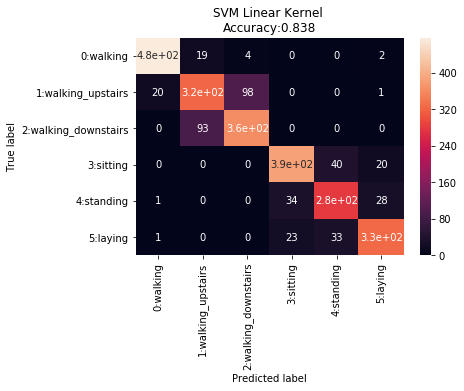

In [31]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)

dt_grid.fit(X_train, y_train)
y_pred = dt_grid.predict(X_test)
print('Accuracy Score:')
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
dt_grid_accuracy = metrics.accuracy_score(y_test,y_pred)
print(metrics.accuracy_score(y_test,y_pred)*100)
print("\n")
print("Classification Report")
print(metrics.classification_report(y_test,y_pred))

#Confusion Matrix for the model
Confusion(y_test,y_pred)



## Accuracy of activities in test set:
Checking how much the model performs by fitting them to the data created of each activity separately.

In [32]:
import warnings
warnings.filterwarnings('ignore')

data = []
labels=['LAYING','STANDING','SITTING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS' ]
# Iterate over each activity
for activity in labels: 
    # Create dataset
    act_data = both_df[label==activity].copy()
#print(act_data)
    act_data_data = act_data.pop('Data')
    act_subject_data = act_data.pop('subject')
    
# Scale data
    scl = StandardScaler() 
    act_data = scl.fit_transform(act_data)

# Reduce dimensions
    pca = PCA(n_components=0.9, random_state=3)
    act_data = pca.fit_transform(act_data)

# Split training testing data
    enc = LabelEncoder()
    label_encoded = enc.fit_transform(act_subject_data)
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(act_data, label_encoded, random_state=3)
    print('Activity: {}'.format(activity))    
    parameters = {'max_depth':np.arange(3,10,2)}
    dt = DecisionTreeClassifier()
    dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)

    dt_grid.fit(X_train_1, y_train_1)
                
    score = accuracy_score(y_true=y_test_1,y_pred = dt_grid.predict(X_test_1))
    print('Accuracy on testset:\t{:.4f}\n'.format(score*100))
    data.append([activity, score])

Activity: LAYING
Accuracy on testset:	32.9218

Activity: STANDING
Accuracy on testset:	22.0126

Activity: SITTING
Accuracy on testset:	23.1461

Activity: WALKING
Accuracy on testset:	62.4130

Activity: WALKING_UPSTAIRS
Accuracy on testset:	48.1865

Activity: WALKING_DOWNSTAIRS
Accuracy on testset:	57.1023



## Random Forest Classifier with GridSearchCV

Accuracy Score:
92.81553398058252


Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       502
           1       0.91      0.80      0.85       443
           2       0.85      0.93      0.88       457
           3       0.95      0.97      0.96       446
           4       0.94      0.92      0.93       343
           5       0.95      0.96      0.95       384

   micro avg       0.93      0.93      0.93      2575
   macro avg       0.93      0.93      0.93      2575
weighted avg       0.93      0.93      0.93      2575

Confusion Matrix:
[[500   1   0   0   0   1]
 [ 13 353  76   0   0   1]
 [  0  34 423   0   0   0]
 [  0   0   0 431   9   6]
 [  0   0   0  14 316  13]
 [  0   0   0   7  10 367]]
Confusion Matrix Plot:


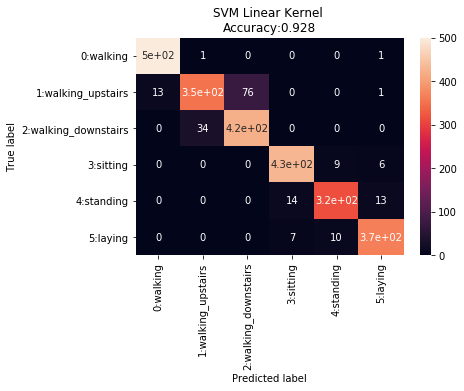

In [33]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)

rfc_grid.fit(X_train, y_train)
y_pred = rfc_grid.predict(X_test)
print('Accuracy Score:')
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
rfc_grid_accuracy = metrics.accuracy_score(y_test,y_pred)
print(metrics.accuracy_score(y_test,y_pred)*100)
print("\n")
print("Classification Report")
print(metrics.classification_report(y_test,y_pred))

#Confusion Matrix for the model
Confusion(y_test,y_pred)


## Accuracy of activities in test set:
Checking how much the model performs by fitting them to the data created of each activity separately.

In [34]:
import warnings
warnings.filterwarnings('ignore')

data = []
labels=['LAYING','STANDING','SITTING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS' ]
# Iterate over each activity
for activity in labels: 
    # Create dataset
    act_data = both_df[label==activity].copy()
#print(act_data)
    act_data_data = act_data.pop('Data')
    act_subject_data = act_data.pop('subject')
    
# Scale data
    scl = StandardScaler() 
    act_data = scl.fit_transform(act_data)

# Reduce dimensions
    pca = PCA(n_components=0.9, random_state=3)
    act_data = pca.fit_transform(act_data)

# Split training testing data
    enc = LabelEncoder()
    label_encoded = enc.fit_transform(act_subject_data)
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(act_data, label_encoded, random_state=3)
    print('Activity: {}'.format(activity))    
    params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
    rfc = RandomForestClassifier()
    rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)

    rfc_grid.fit(X_train_1, y_train_1)
                
    score = accuracy_score(y_true=y_test_1,y_pred = rfc_grid.predict(X_test_1))
    print('Accuracy on testset:\t{:.4f}\n'.format(score*100))
    data.append([activity, score])

Activity: LAYING
Accuracy on testset:	66.8724

Activity: STANDING
Accuracy on testset:	54.5073

Activity: SITTING
Accuracy on testset:	52.3596

Activity: WALKING
Accuracy on testset:	98.6079

Activity: WALKING_UPSTAIRS
Accuracy on testset:	95.0777

Activity: WALKING_DOWNSTAIRS
Accuracy on testset:	93.4659



## Gradient boost Decision Tree with GridSearchCV

Accuracy Score:
94.40776699029126


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       502
           1       0.90      0.84      0.87       443
           2       0.87      0.92      0.89       457
           3       0.98      0.98      0.98       446
           4       0.97      0.97      0.97       343
           5       0.97      0.97      0.97       384

   micro avg       0.94      0.94      0.94      2575
   macro avg       0.95      0.94      0.94      2575
weighted avg       0.94      0.94      0.94      2575

Confusion Matrix:
[[495   6   0   0   0   1]
 [  4 373  65   0   0   1]
 [  0  37 420   0   0   0]
 [  0   0   0 438   4   4]
 [  0   0   0   5 331   7]
 [  0   0   0   3   7 374]]
Confusion Matrix Plot:


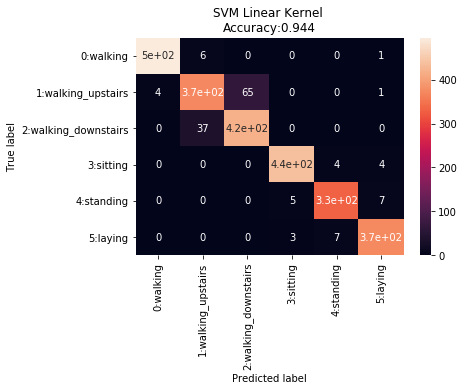

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)

gbdt_grid.fit(X_train, y_train)
y_pred = gbdt_grid.predict(X_test)
print('Accuracy Score:')
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
gbdt_grid_accuracy = metrics.accuracy_score(y_test,y_pred)
print(metrics.accuracy_score(y_test,y_pred)*100)
print("\n")
print("Classification Report")
print(metrics.classification_report(y_test,y_pred))

#Confusion Matrix for the model
Confusion(y_test,y_pred)


## Accuracy of activities in test set:
Checking how much the model performs by fitting them to the data created of each activity separately.

In [36]:
import warnings
warnings.filterwarnings('ignore')

data = []
labels=['LAYING','STANDING','SITTING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS' ]
# Iterate over each activity
for activity in labels: 
    # Create dataset
    act_data = both_df[label==activity].copy()
#print(act_data)
    act_data_data = act_data.pop('Data')
    act_subject_data = act_data.pop('subject')
    
# Scale data
    scl = StandardScaler() 
    act_data = scl.fit_transform(act_data)

# Reduce dimensions
    pca = PCA(n_components=0.9, random_state=3)
    act_data = pca.fit_transform(act_data)

# Split training testing data
    enc = LabelEncoder()
    label_encoded = enc.fit_transform(act_subject_data)
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(act_data, label_encoded, random_state=3)
    print('Activity: {}'.format(activity))    
    param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
    gbdt = GradientBoostingClassifier()
    gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)

    gbdt_grid.fit(X_train_1, y_train_1)
    
    score = accuracy_score(y_true=y_test_1,  y_pred = gbdt_grid.predict(X_test_1))
    print('Accuracy on testset:\t{:.4f}\n'.format(score*100))
    data.append([activity, score])

Activity: LAYING
Accuracy on testset:	51.0288

Activity: STANDING
Accuracy on testset:	45.2830

Activity: SITTING
Accuracy on testset:	39.3258

Activity: WALKING
Accuracy on testset:	80.7425

Activity: WALKING_UPSTAIRS
Accuracy on testset:	70.4663

Activity: WALKING_DOWNSTAIRS
Accuracy on testset:	68.1818



##  Comparision of accuracy between all the models

In [37]:
print('\n                              Accuracy')     
print('Logistic Regression         : {:.06}%  '.format(log_grid_accuracy * 100))
print('SVC with Default parameters : {:.06}%  '.format(SVC_default_accuracy * 100))
print('Default Linear SVC          : {:.06}%  '.format(linear_default_accuracy * 100))
print('Linear SVC with parameters  : {:.06}%  '.format(linear_default_accuracy * 100))
print('Default RBF SVC             : {:.06}%  '.format(rbf_default_accuracy * 100))
print('RBF SVC with parameters     : {:.06}%  '.format(rbf_grid_accuracy * 100))
print('Default Poly SVC            : {:.06}%  '.format(poly_default_accuracy * 100))
print('Poly SVC with parameters    : {:.06}%  '.format(poly_grid_accuracy * 100))
print('Decision Tree               : {:.06}%  '.format(dt_grid_accuracy * 100))
print('Random Forest Classifier    : {:.06}%  '.format(rfc_grid_accuracy * 100))
print('Gradient Boost Decision T   : {:.06}%  '.format(gbdt_grid_accuracy * 100))


                              Accuracy
Logistic Regression         : 95.7282%  
SVC with Default parameters : 91.9223%  
Default Linear SVC          : 95.767%  
Linear SVC with parameters  : 95.767%  
Default RBF SVC             : 91.9223%  
RBF SVC with parameters     : 96.5825%  
Default Poly SVC            : 96.9709%  
Poly SVC with parameters    : 97.2039%  
Decision Tree               : 83.8058%  
Random Forest Classifier    : 92.8155%  
Gradient Boost Decision T   : 94.4078%  


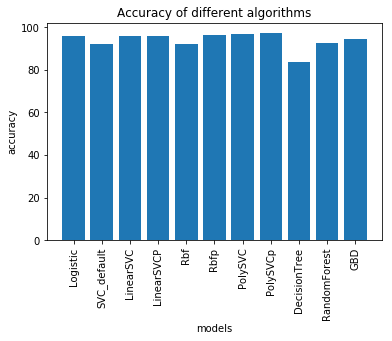

In [38]:
import matplotlib.pyplot as plt 

left = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] 
# heights of bars 
a = [log_grid_accuracy* 100,SVC_default_accuracy* 100,linear_default_accuracy* 100,linear_default_accuracy* 100,rbf_default_accuracy* 100,
              rbf_grid_accuracy* 100,poly_default_accuracy* 100,poly_grid_accuracy* 100,dt_grid_accuracy* 100,rfc_grid_accuracy* 100,gbdt_grid_accuracy* 100]

# labels for bars 
tick_label = ['Logistic','SVC_default','LinearSVC','LinearSVCP','Rbf','Rbfp','PolySVC','PolySVCp','DecisionTree','RandomForest','GBD'] 

# plotting a bar chart 
plt.bar(left, a, tick_label = tick_label,width=0.8) 
plt.xticks(left, tick_label, rotation='vertical')

# naming the x-axis 
plt.xlabel('models') 
# naming the y-axis 
plt.ylabel('accuracy') 
# plot title 
plt.title('Accuracy of different algorithms') 

# function to show the plot 
plt.show() 


From above plot we can see that SVC with Polynomial Kernel has highest accuracy.
NOw we predict the values of test.csv using that model and compare with actual values

In [39]:
data_1 = both_df.copy()

enc = LabelEncoder()
label_encoded = enc.fit_transform(label)
test_df_1=test_df.copy()
test_df_1['Data']='Test'
test_df_1.pop('Data')
test_df_1.pop('subject')
test_label = test_df_1.pop('Activity')



In [66]:
#df_2=pd.DataFrame()

df2 = pd.DataFrame(test_df)

parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
poly_svm = SVC(kernel='poly')
poly_svm_grid = GridSearchCV(poly_svm,param_grid=parameters, n_jobs=-1)

poly_svm_grid.fit(test_df_1,test_label)

predicted=poly_svm_grid.predict(test_df_1)
df2['predicted']=predicted
# df_2=df2[1:3]
# df_2=df_2.append(df2[40:42]).append(df2[70:72]).append(df2[100:102]).append(df2[140:142]).append(df2[800:802]).append(df2[2000:2002])
# df_2.pop('Data')
# df_2.reset_index(inplace=True,drop=True)
# df_2
df2=df2[0:500]

The "SVC with Polynomial Kernel" has highest accuracy of "97.2039%".

In [68]:
df2.to_excel("output2.xlsx") 